In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
% matplotlib inline

# 节点数&边数

节点数：105
边数：262


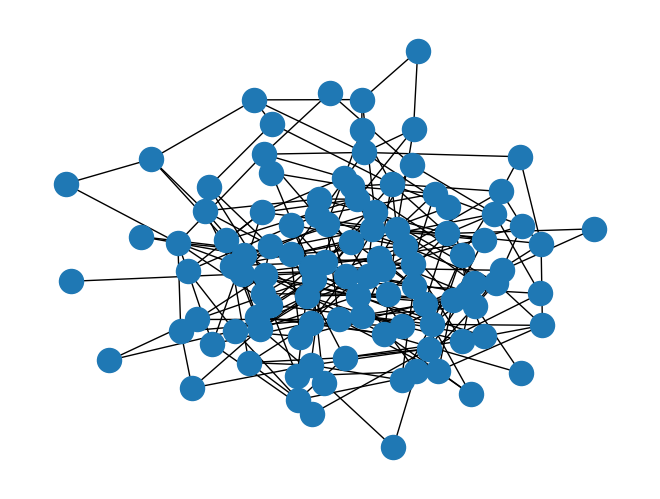

In [131]:
# 读入邻接表
data = pd.read_csv('E:\TangDoc\网络科学\大作业\测试数据\data9.csv', header=None)
adj_list = data.to_numpy()
adj_list = [(pair[0], pair[1]) for pair in adj_list]

# 由邻接表构图
g_data = nx.Graph(adj_list)
# 得到节点数，边数
num_nodes = g_data.number_of_nodes()
num_edges = g_data.number_of_edges()
print(f'节点数：{num_nodes}')
print(f'边数：{num_edges}')
nx.draw(g_data)



# 平均度&度分布

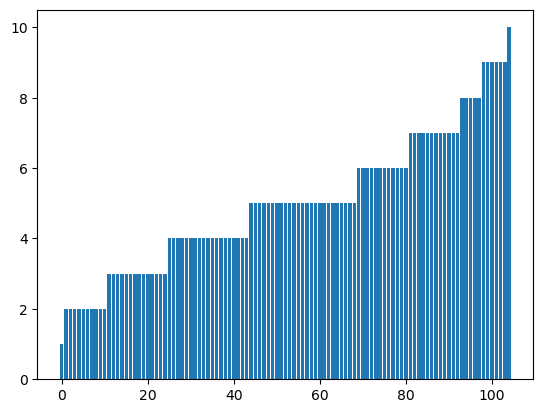

Avg Degree: 4.9904761904761905
Degree Hist: [0, 1, 10, 14, 19, 25, 12, 12, 5, 6, 1]


In [13]:

degree_list = list(g_data.degree())
sorted_data = sorted(degree_list, key=lambda x: x[0])

draw_x = [pair[0] for pair in sorted_data]
draw_y = [pair[1] for pair in sorted_data]

plt.bar(draw_x, draw_y)
plt.show()

avg_degree = np.sum(draw_y) / num_nodes
print(f'Avg Degree: {avg_degree}')

degree_hist = nx.degree_histogram(g_data)
print(f'Degree Hist: {degree_hist}')

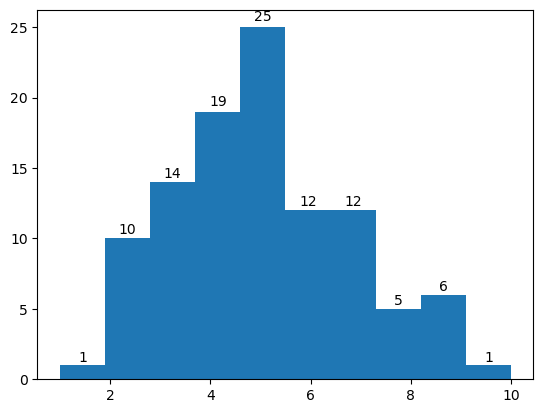

[ 1. 10. 14. 19. 25. 12. 12.  5.  6.  1.]


In [14]:
# 验证度分布
n, bins, patches = plt.hist(draw_y, bins=10)
for i in range(len(n)):
    plt.text(bins[i] + (bins[1] - bins[0]) / 2, n[i] * 1.01, int(n[i]), ha='center', va='bottom')
plt.show()
print(patches.datavalues)

# 余平均度、余度分布

Avg Remain Degree: 5.712842025699169


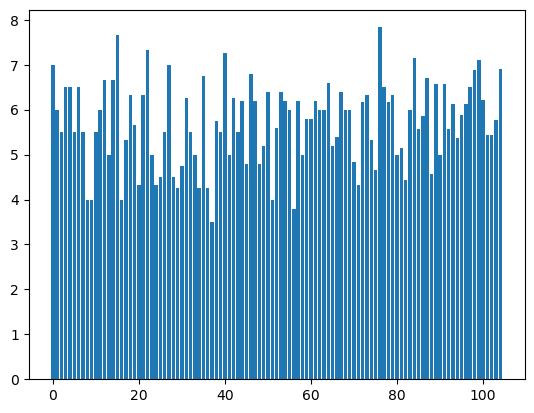

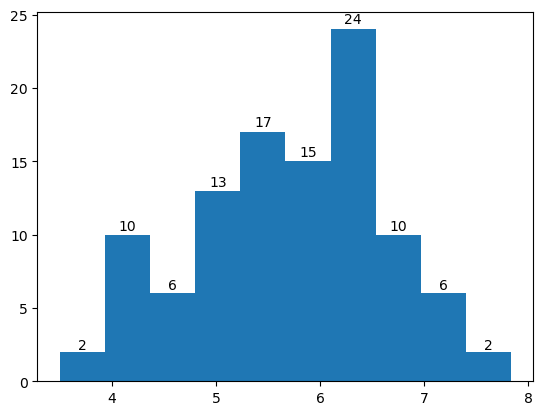

Hist Remain Degree: [ 2. 10.  6. 13. 17. 15. 24. 10.  6.  2.]
[(6.0, 8), (5.5, 8), (5.0, 7), (6.2, 5), (6.5, 5), (4.0, 4), (6.333333333333333, 4), (4.25, 3), (4.333333333333333, 3), (6.4, 3), (7.0, 2), (4.8, 2), (4.5, 2), (5.444444444444445, 2), (6.166666666666667, 2), (6.666666666666667, 2), (5.571428571428571, 2), (6.125, 2), (5.2, 2), (5.333333333333333, 2), (5.8, 2), (6.25, 2), (6.571428571428571, 2), (4.571428571428571, 1), (4.428571428571429, 1), (3.8, 1), (4.75, 1), (5.857142857142857, 1), (3.5, 1), (5.75, 1), (4.666666666666667, 1), (6.222222222222222, 1), (7.666666666666667, 1), (5.777777777777778, 1), (4.833333333333333, 1), (5.875, 1), (6.714285714285714, 1), (5.666666666666667, 1), (7.333333333333333, 1), (6.888888888888889, 1), (5.375, 1), (5.6, 1), (5.142857142857143, 1), (5.4, 1), (7.833333333333333, 1), (6.75, 1), (6.9, 1), (7.25, 1), (7.142857142857143, 1), (7.111111111111111, 1), (6.6, 1), (6.8, 1)]


In [80]:
degree_list = [pair[1] for pair in sorted_data]

remian_deg_list = []
for i in g_data.nodes:
    remain_degs = 0
    for j in g_data.neighbors(i):
        remain_degs += g_data.degree(j)
    remain_deg_i = remain_degs / g_data.degree(i)
    remian_deg_list.append((i, remain_deg_i))

rmain_deg_draw_x = [pair[0] for pair in remian_deg_list]
rmain_deg_draw_y = [pair[1] for pair in remian_deg_list]
avg_remain_degree = np.sum(rmain_deg_draw_y) / num_nodes
print(f'Avg Remain Degree: {avg_remain_degree}')

plt.bar(rmain_deg_draw_x, rmain_deg_draw_y)
plt.show()

# 验证度分布
n, bins, patches = plt.hist(rmain_deg_draw_y, bins=10)
for i in range(len(n)):
    plt.text(bins[i] + (bins[1] - bins[0]) / 2, n[i] * 1.01, int(n[i]), ha='center', va='bottom')
plt.show()
print(f'Hist Remain Degree: {patches.datavalues}')

counter = Counter(rmain_deg_draw_y)
count_pairs = counter.most_common()
print(count_pairs)

# 平均路径&聚类系数

In [33]:
# 计算平均路径和聚类系数
avg_path_length = nx.average_shortest_path_length(g_data)
avg_clustering_coefficient = nx.average_clustering(g_data)
print(f'平均路径长度：{avg_path_length}')
print(f'聚类系数：{avg_clustering_coefficient}')

平均路径长度：3.049267399267399
聚类系数：0.04002267573696145


# 网络统计函数

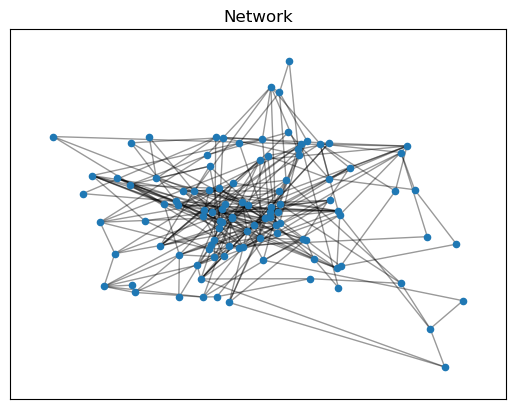

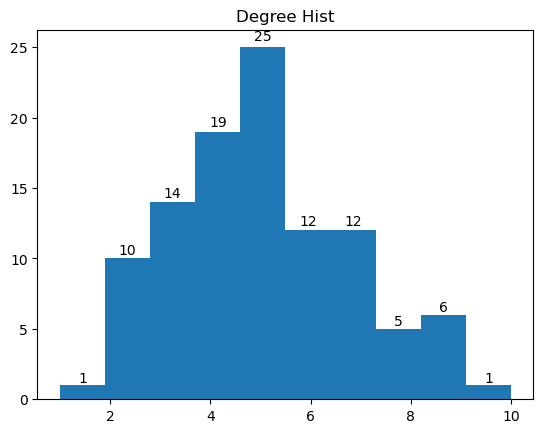

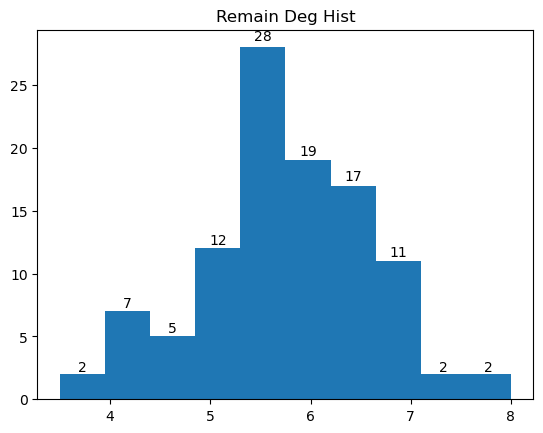

节点数: 105
边数: 262
平均度: 4.9904761904761905
度分布: [0, 1, 10, 14, 19, 25, 12, 12, 5, 6, 1]
余平均度: 5.718257747543461
余度分布: [ 2.  7.  5. 12. 28. 19. 17. 11.  2.  2.]
平均路径: 3.049267399267399
聚类系数: 0.04002267573696145


In [148]:

'''
    统计Graph.Data中的各个属性
    输入：nx.Graph
    输出：节点数、边数、平均度、度分布、余平均度、余度分布、平均路径和聚类系数
'''


def statistic_graph(g_data):
    # 统计节点数和边数
    # nx.draw(g_data)
    pos = nx.spring_layout(g_data, k=0.001, seed=0)
    nx.draw_networkx_nodes(g_data, pos, node_size=20)
    nx.draw_networkx_edges(g_data, pos, alpha=0.4)
    plt.title('Network')
    plt.show()
    num_nodes = g_data.number_of_nodes()
    num_edges = g_data.number_of_edges()

    degree_list = list(g_data.degree())
    sorted_data = sorted(degree_list, key=lambda x: x[0])
    draw_y = [pair[1] for pair in sorted_data]

    # 计算平均度和度分布
    avg_degree = np.sum(draw_y) / num_nodes
    degree_hist = nx.degree_histogram(g_data)

    n, bins, patches = plt.hist(draw_y, bins=10)
    for i in range(len(n)):
        plt.text(bins[i] + (bins[1] - bins[0]) / 2, n[i] * 1.01, int(n[i]), ha='center', va='bottom')
    plt.title('Degree Hist')
    plt.show()

    # 计算余平均度和余度分布
    remian_deg_list = []
    for i in g_data.nodes:
        remain_degs = 0
        for j in g_data.neighbors(i):
            remain_degs += g_data.degree(j)
        remain_deg_i = remain_degs / g_data.degree(i)
        remian_deg_list.append(remain_deg_i)
    avg_degree_remainder = np.sum(remian_deg_list) / num_nodes

    n, bins, patches = plt.hist(remian_deg_list, bins=10)
    for i in range(len(n)):
        plt.text(bins[i] + (bins[1] - bins[0]) / 2, n[i] * 1.01, int(n[i]), ha='center', va='bottom')
    plt.title('Remain Deg Hist')
    plt.show()
    degree_remainder_hist = patches.datavalues

    # 计算平均路径和聚类系数
    avg_path_length = nx.average_shortest_path_length(g_data)
    if g_data.is_multigraph():
        avg_clustering_coefficient = -1
    else:
        avg_clustering_coefficient = nx.average_clustering(g_data)

    # 打印统计结果
    print("节点数:", num_nodes)
    print("边数:", num_edges)
    print("平均度:", avg_degree)
    print("度分布:", degree_hist)
    print("余平均度:", avg_degree_remainder)
    print("余度分布:", degree_remainder_hist)
    print("平均路径:", avg_path_length)
    print("聚类系数:", avg_clustering_coefficient)


statistic_graph(g_data)

# 零模型Code

In [164]:

# 生成0阶零模型
def generate_null_model_0(n, m):
    return nx.gnm_random_graph(n, m)


def _generate_null_model_0(n, m):
    g_0 = nx.Graph()

    node_list = range(n)
    g_0.add_nodes_from(node_list)

    count_edge = 0
    while count_edge < m:
        i, j = list(np.random.choice(node_list, size=2, replace=False))
        if g_0.has_edge(i, j) or g_0.has_edge(j, i):
            continue
        else:
            count_edge += 1
            g_0.add_edge(i, j)

    return g_0


# 生成1阶零模型
def generate_null_model_1(degree_seq):
    g_1 = nx.configuration_model(degree_seq)
    return g_1


# 基于断边重连生成1阶级零模型
def generate_null_model_1_reconnect(graph, nswap=10, max_tries=200):
    g_1 = nx.double_edge_swap(graph, nswap=nswap, max_tries=max_tries)
    return g_1


# 自己实现的通过断开重连生成1阶零模型
def _generate_null_model_1_recon(graph, nswap=10, max_try=100):
    node_list = list(g_data.nodes)

    swap_count = 0
    try_count = 0
    while swap_count < nswap and try_count < max_try:
        try_count += 1
        # 随机选择两个起始节点
        i_1, i_2 = list(np.random.choice(node_list, size=2, replace=False))
        # 从i的adj随机选择一个尾节点
        j_1 = np.random.choice(list(g_data.adj[i_1]))
        j_2 = np.random.choice(list(g_data.adj[i_2]))

        if i_1 > j_1:
            t = i_1
            i_1 = j_1
            j_1 = t

        if i_2 > j_2:
            t = i_2
            i_2 = j_2
            j_2 = t

        if j_1 == j_2 or g_data.has_edge(i_1, i_2) or g_data.has_edge(j_1, j_2) or g_data.has_edge(i_2,
                                                                                                   i_1) or g_data.has_edge(
            j_2, j_1) or g_data.has_edge(i_1, j_2) or g_data.has_edge(i_2, j_1) or g_data.has_edge(j_2,
                                                                                                   i_1) or g_data.has_edge(
            j_1, i_2):
            continue
        swap_count += 1
        # 交换两条边
        graph.add_edges_from([(i_1, j_2), (i_2, j_1)])
        graph.remove_edges_from([(i_1, j_1), (i_2, j_2)])
    print(f'try:{try_count}')
    return graph


def _generate_null_model_2_recon(graph, nswap=10, max_try=1000):
    node_list = list(g_data.nodes)

    swap_count = 0
    try_count = 0
    while swap_count < nswap and try_count < max_try:
        try_count += 1
        # 随机选择两个起始节点
        i_1, i_2 = list(np.random.choice(node_list, size=2, replace=False))

        # 从i的adj随机选择一个尾节点
        j_1 = np.random.choice(list(g_data.adj[i_1]))
        j_2 = np.random.choice(list(g_data.adj[i_2]))

        if j_1 == j_2 or g_data.degree()[j_1] != g_data.degree()[j_2] or g_data.degree()[i_1] != g_data.degree()[i_2]:
            continue

        if i_1 > j_1:
            t = i_1
            i_1 = j_1
            j_1 = t

        if i_2 > j_2:
            t = i_2
            i_2 = j_2
            j_2 = t

        if g_data.has_edge(i_1, i_2) or g_data.has_edge(j_1, j_2) or g_data.has_edge(i_2, i_1) or g_data.has_edge(j_2,
                                                                                                                  j_1) or g_data.has_edge(
            i_1, j_2) or g_data.has_edge(i_2, j_1) or g_data.has_edge(j_2, i_1) or g_data.has_edge(j_1, i_2):
            continue
        swap_count += 1
        # 交换两条边
        graph.add_edges_from([(i_1, j_2), (i_2, j_1)])
        graph.remove_edges_from([(i_1, j_1), (i_2, j_2)])
    print(f'try:{try_count}')
    return graph


# Original Graph

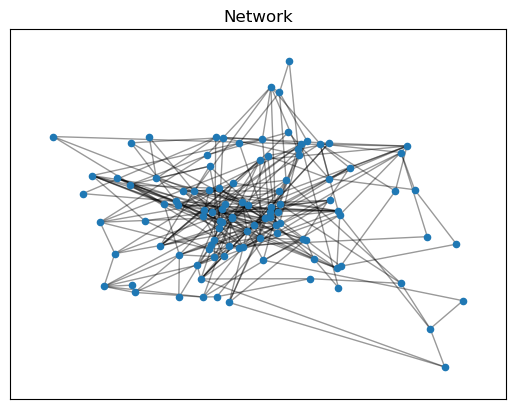

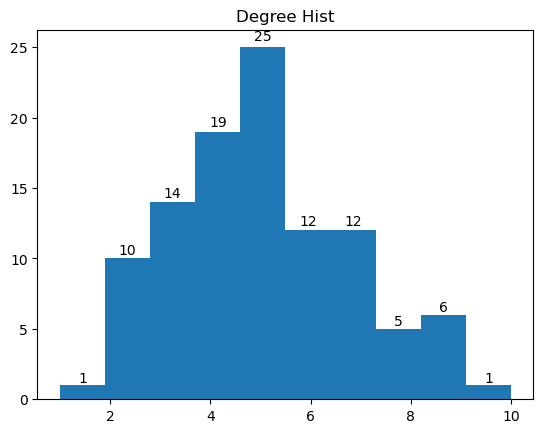

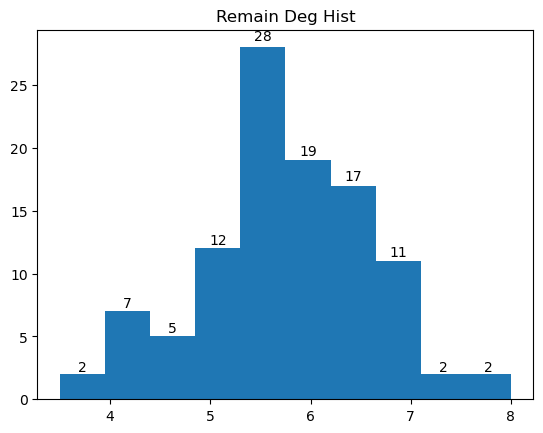

节点数: 105
边数: 262
平均度: 4.9904761904761905
度分布: [0, 1, 10, 14, 19, 25, 12, 12, 5, 6, 1]
余平均度: 5.718257747543461
余度分布: [ 2.  7.  5. 12. 28. 19. 17. 11.  2.  2.]
平均路径: 3.049267399267399
聚类系数: 0.04002267573696145


In [151]:
statistic_graph(g_data)

# Test Gen_0

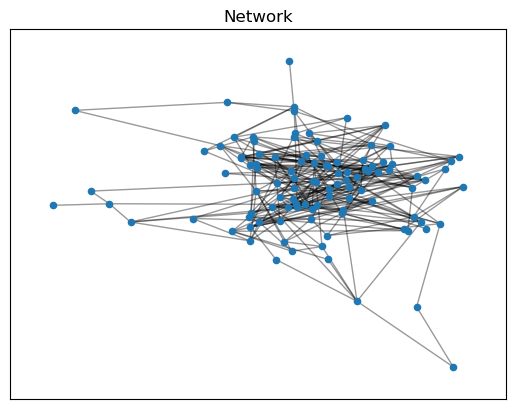

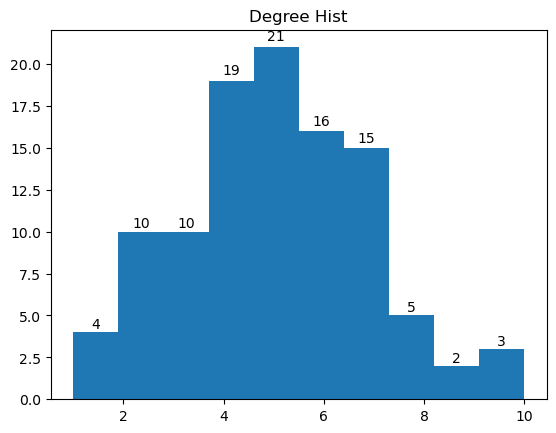

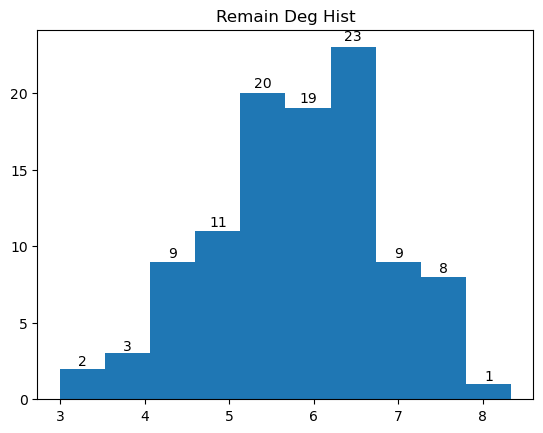

节点数: 105
边数: 262
平均度: 4.9904761904761905
度分布: [0, 4, 10, 10, 19, 21, 16, 15, 5, 2, 3]
余平均度: 5.83827664399093
余度分布: [ 2.  3.  9. 11. 20. 19. 23.  9.  8.  1.]
平均路径: 3.0783882783882786
聚类系数: 0.050476190476190466


In [157]:
n = 105  # node count
m = 262  # edge count
g_model_0 = generate_null_model_0(n, m)
statistic_graph(g_model_0)

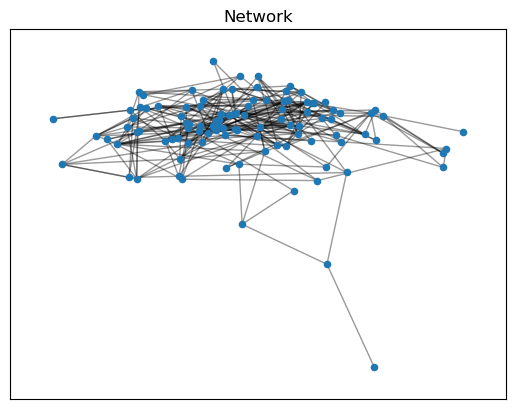

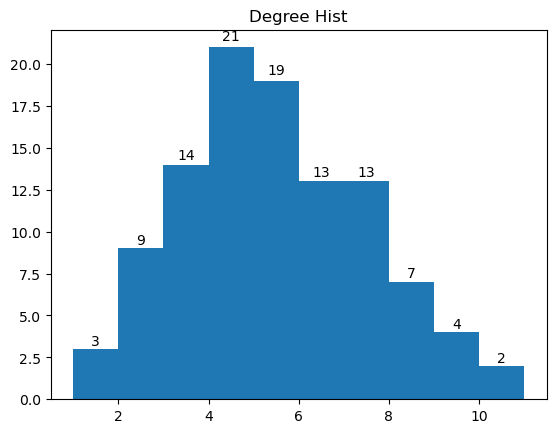

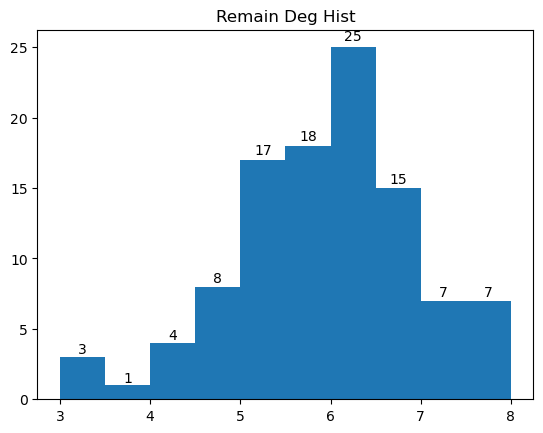

节点数: 105
边数: 262
平均度: 4.9904761904761905
度分布: [0, 3, 9, 14, 21, 19, 13, 13, 7, 4, 1, 1]
余平均度: 5.842468219611077
余度分布: [ 3.  1.  4.  8. 17. 18. 25. 15.  7.  7.]
平均路径: 3.0963369963369964
聚类系数: 0.047360681646395925


In [165]:
_g_model_0 = _generate_null_model_0(n, m)
statistic_graph(_g_model_0)

# Test Gen_1

In [153]:
g_degree_seq = [val for (node, val) in g_data.degree()]

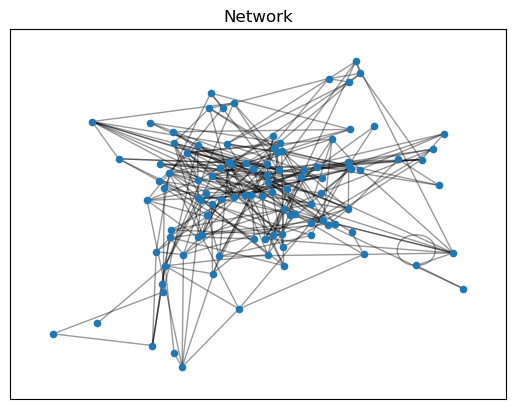

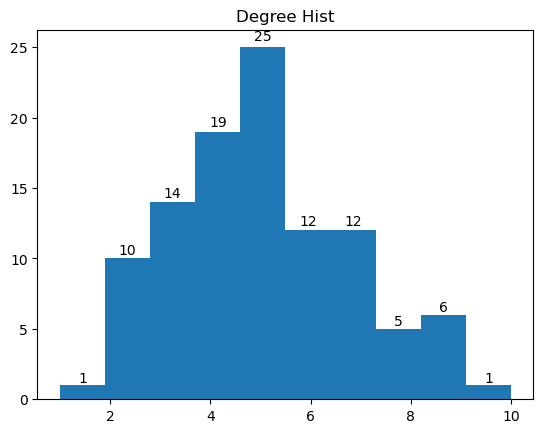

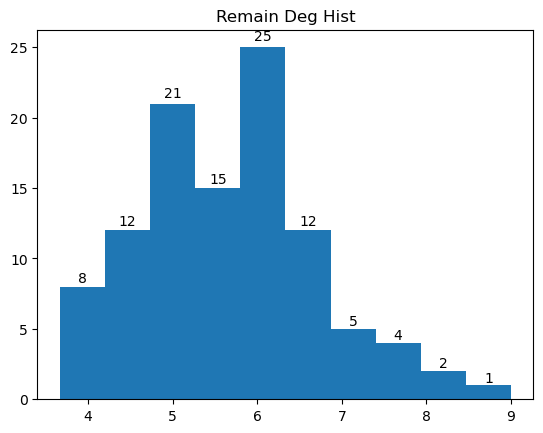

节点数: 105
边数: 262
平均度: 4.9904761904761905
度分布: [0, 1, 10, 14, 19, 25, 12, 12, 5, 6, 1]
余平均度: 5.662607709750566
余度分布: [ 8. 12. 21. 15. 25. 12.  5.  4.  2.  1.]
平均路径: 3.0923076923076924
聚类系数: -1


In [154]:
g_model_1 = generate_null_model_1(g_degree_seq)
statistic_graph(g_model_1)

## Test gen1 by reconn

try:12


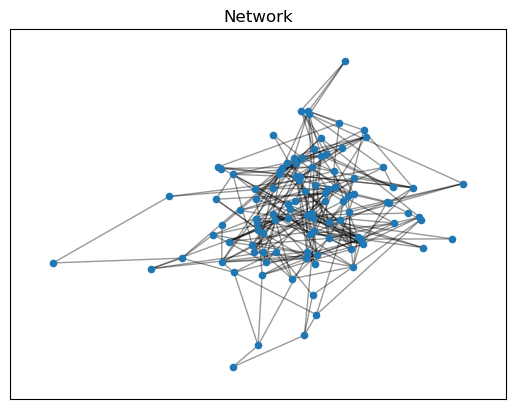

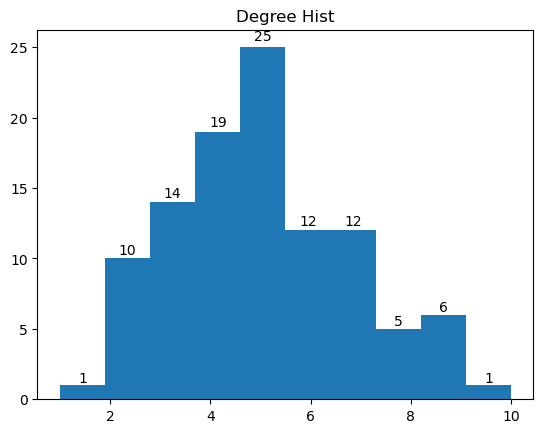

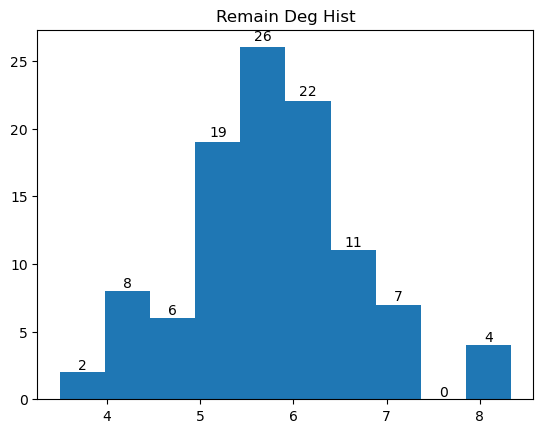

节点数: 105
边数: 262
平均度: 4.9904761904761905
度分布: [0, 1, 10, 14, 19, 25, 12, 12, 5, 6, 1]
余平均度: 5.747082388510959
余度分布: [ 2.  8.  6. 19. 26. 22. 11.  7.  0.  4.]
平均路径: 3.0534798534798533
聚类系数: 0.04018140589569162


In [159]:
g_model_1_recon = _generate_null_model_1_recon(g_data.copy())
statistic_graph(g_model_1_recon)

# Test Gen_2

try:479


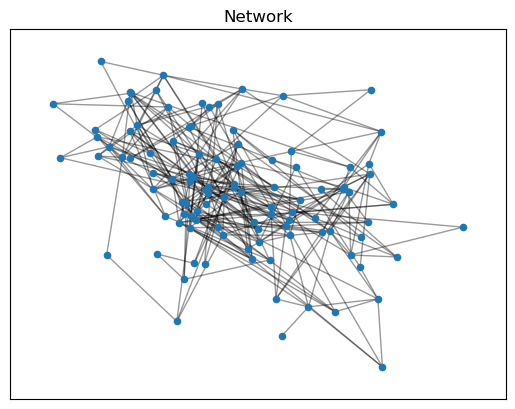

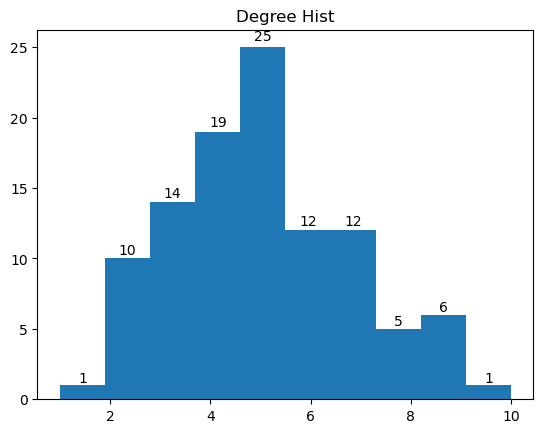

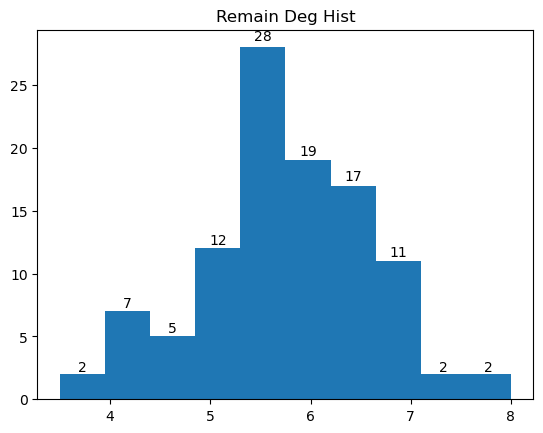

节点数: 105
边数: 262
平均度: 4.9904761904761905
度分布: [0, 1, 10, 14, 19, 25, 12, 12, 5, 6, 1]
余平均度: 5.718257747543461
余度分布: [ 2.  7.  5. 12. 28. 19. 17. 11.  2.  2.]
平均路径: 3.0567765567765566
聚类系数: 0.044935752078609226


In [163]:
g_model_2_recon = _generate_null_model_2_recon(g_data.copy())
statistic_graph(g_model_2_recon)